In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df=pd.read_csv(r"C:\Users\User\Desktop\python_practice\AIml\csv\churn.csv")

In [28]:
#considering we have done the analysis and cleaning ,we decide to predict

In [29]:
df.head(4)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [31]:
x=df.drop(['CustomerId','Surname','Exited'],axis=1)

In [45]:
y=df.Exited

In [34]:
x.shape

(10000, 10)

In [35]:
y.shape

(10000,)

In [36]:
#Logistic regression --> maximum likelyhood
# Logistic Regression is the "classification" sibling of Linear Regression. Despite having "Regression" in its name,
# it is primarily used for predicting categories (Yes/No, Spam/Not Spam, True/False) rather than exact numbers.
#     The Core Difference: Output Type
# Linear Regression: Predicts a continuous number (e.g., predicting a house price of $347,500). The output can theoretically be anything from negative infinity to positive infinity.

# Logistic Regression: Predicts a probability between 0 and 1 (e.g., predicting a 76% chance that a customer will churn). 
#     This probability is then typically rounded to a category (Class 0 or Class 1).
#p(y)>0
#p(y)<1
# e(y)=b0+b1x1+b1x1.......bnxn
# p(y)----> exp(b0+b1x1)
# p(y)---->(exp(b0+b1x1)/exp(b0+b1x1)+1)
#1-p-->1-(exp(y)/exp(y)+1)
#p/1-p
#odds-->win or loss matc=0.90/0.10
# p(sucess)=0.90
# p(failure)=0.10

# g(e(y))--->b0+b1x1
# g--->sinverse logit
# sigmoid function-->1/1+exp(-y)




In [48]:
#handling categorical variables

In [49]:
x1=pd.get_dummies(x,drop_first=True)

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=4)

In [68]:
x_train.shape

(8000, 11)

In [69]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4983,543,30,4,140916.81,1,1,0,157711.18,False,False,True
6789,668,46,0,0.00,2,0,0,29388.02,False,False,True
2221,767,35,6,132253.22,1,1,0,115566.57,True,False,False
6043,629,31,6,0.00,2,1,0,93881.75,False,False,True
1564,773,42,8,152324.66,2,1,0,171733.22,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
456,733,33,3,0.00,1,1,1,7666.73,False,False,True
6017,487,34,2,96019.50,1,0,0,9085.00,False,False,False
709,686,34,3,123971.51,2,1,0,147794.63,False,False,False
8366,637,41,2,0.00,2,0,1,102515.42,False,False,True


# Desicion Tree

In [99]:
from sklearn import tree

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score
dt=DecisionTreeClassifier(max_depth=9,min_samples_leaf=6,min_samples_split=5) # trees are prone to overfitting ,tackle it using hyperparameter

In [156]:
dtmodel=dt.fit(x_train,y_train)


In [157]:
pred=dtmodel.predict(x_test)

In [158]:
pd.crosstab(y_test,pred)

col_0,0,1
Exited,,
0,1531,73
1,197,199


In [159]:
accuracy_score(pred,y_test)

0.865

In [160]:
precision_score(pred,y_test)

0.5025252525252525

In [161]:
# tree

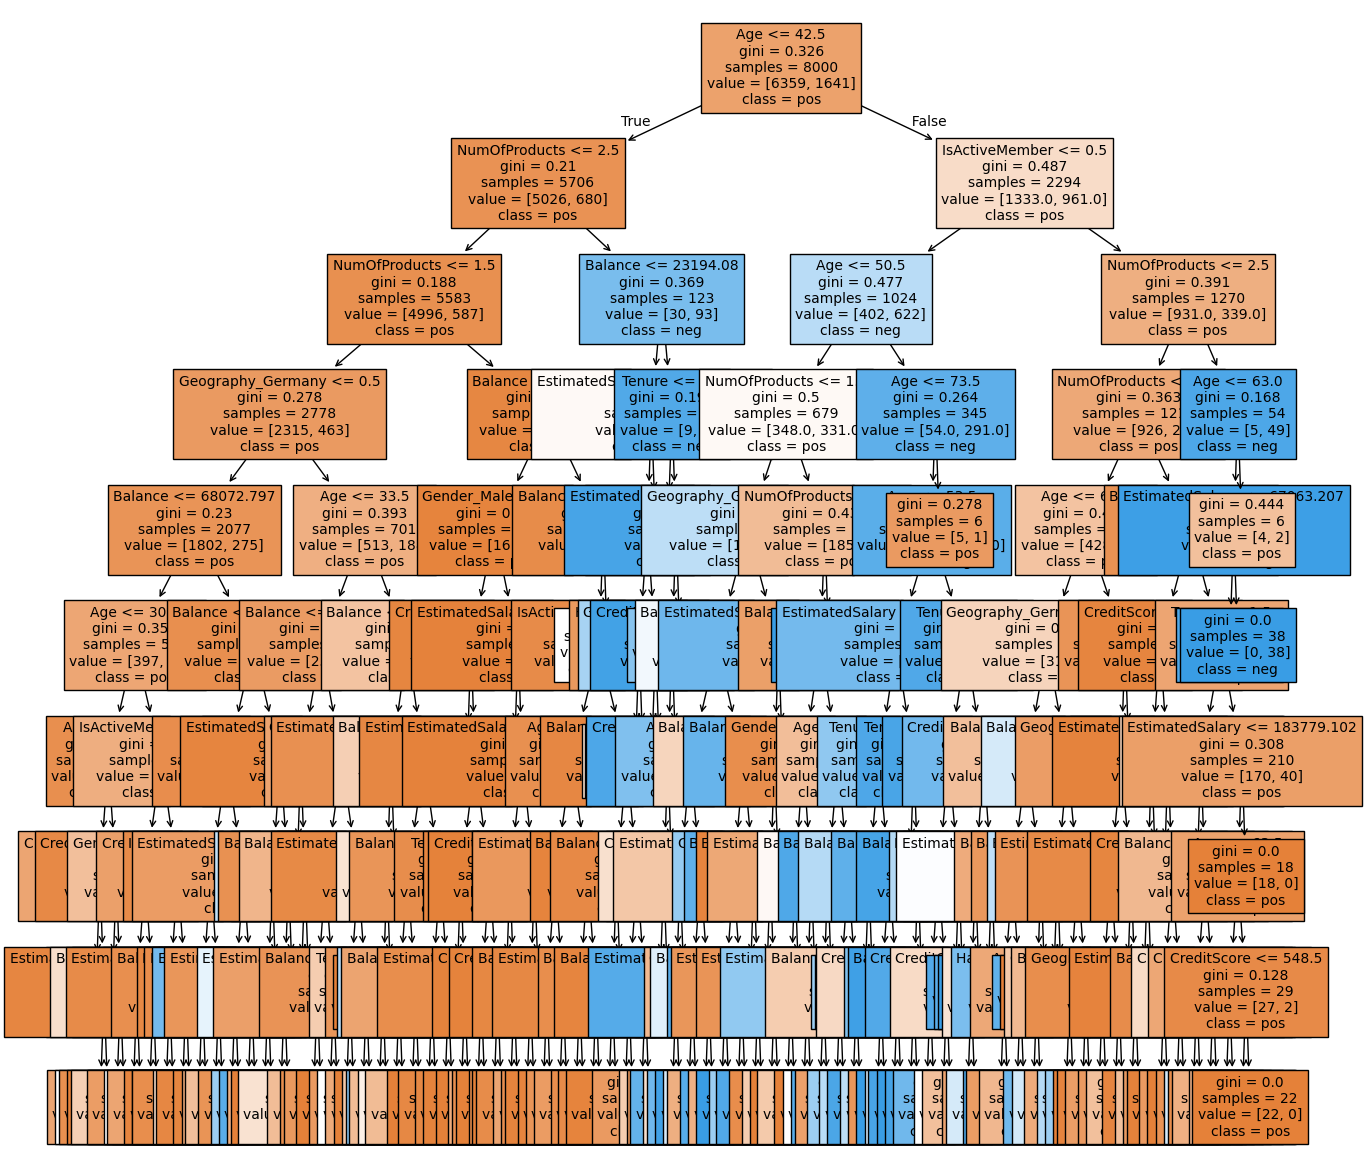

In [162]:
plt.figure(figsize=(15,15))
tree.plot_tree(decision_tree=dtmodel, feature_names=x1.columns, class_names=['pos','neg'],filled=True,fontsize=10)
plt.show()

In [163]:
#pruning
#Grid Search --> optimum Hyperparameters
#Cost complexityu pruning--> based on a cost parameter

In [164]:
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score

In [166]:
params={
    'max_depth':[5,6,8,10],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2]
}
gcv=GridSearchCV(estimator=dtmodel,param_grid=params)
gcv.fit(x_train,y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeC...mples_split=5)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [5, 6, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 3, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 :

In [167]:
gcv.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 4}

In [168]:
gcv.best_score_

np.float64(0.85725)

# random forest

In [170]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [171]:
rfmodel=rf.fit(x_train,y_train)

In [172]:
rfpred=rfmodel.predict(x_test)

In [173]:
pd.crosstab(y_test,rfpred)

col_0,0,1
Exited,,
0,1546,58
1,205,191


In [174]:
accuracy_score(rfpred,y_test)

0.8685

# Data Preparation

In [175]:
# data preparation techniques

# 1.Data preprocessing:Sampling ,Data transformation--> Standardization,Normalization
# 2.Cross-Validation Techniques:K-fold,startified K-fold,repeated K-fold
# 3.Feature Selection Techniques:P-value,Step function,K-best,RFE

# Data Transformation 

## standardization : 
(Center & Scale): (x1-mean(x))/std(x)

In [177]:
df.EstimatedSalary

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [180]:
(101348.88-df.EstimatedSalary.mean())/df.EstimatedSalary.std()

np.float64(0.02188539964332686)

In [185]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
stdscalar=StandardScaler()

In [187]:
stdscalar.fit_transform(df['EstimatedSalary'].values.reshape(-1,1))

array([[ 0.02188649],
       [ 0.21653375],
       [ 0.2406869 ],
       ...,
       [-1.00864308],
       [-0.12523071],
       [-1.07636976]], shape=(10000, 1))

## Normalization -->
x1-min(x)/(max(x)-min(x))--->range function 

In [188]:
norm=MinMaxScaler()

In [189]:
norm.fit_transform(df['EstimatedSalary'].values.reshape(-1,1))

array([[0.50673489],
       [0.56270874],
       [0.56965435],
       ...,
       [0.21039009],
       [0.46442905],
       [0.19091423]], shape=(10000, 1))

In [190]:
#implementation

In [191]:
x_scaled=stdscalar.fit_transform(x1)

In [193]:
df.EstimatedSalary.values.reshape(-1,1)

array([[101348.88],
       [112542.58],
       [113931.57],
       ...,
       [ 42085.58],
       [ 92888.52],
       [ 38190.78]], shape=(10000, 1))

# Feature Selection Techniques

## p-value

In [ ]:
### p-values and step functions are fundamental concepts that bridge the gap between classical statistics and modern Machine Learning. 
### One helps you decide if your data is "lying" to you, while the other is a building block for how models make decisions.

In [ ]:
### p-value (probability value) measures the evidence against a null hypothesis. 
### The null hypothesis usually states that "there is no effect" or "this feature has no impact on the outcome."

In [200]:
# Low p-value ($\leq 0.05$): Suggests the observed pattern is unlikely to have happened by random chance. You "reject the null hypothesis." 
#     The feature is likely statistically significant.
# High p-value ($> 0.05$): Suggests the pattern could easily be a coincidence. You "fail to reject the null hypothesis."

## Step-function

In [203]:
# A Step Function is a mathematical function that stays constant within certain intervals but "jumps" abruptly at specific points. 
# The most common version in ML is the Heaviside Step Function, which output $0$ if the input is negative and $1$ if the input is positive.

In [204]:
# You use p-values to realize that "Favorite Color" is a useless feature (high p-value) and remove it.
# You then use a step function logic (within a Decision Tree) to say: "If Credit Score $> 700$, Approve."

In [205]:
from sklearn.feature_selection import SelectKBest, chi2, RFE
#SelectKBest is a Filter Method. It looks at each feature independently, 
#calculates a score to see how much that feature relates to the target variable, and keeps the top $K$ features.

# RFE, or Recursive Feature Elimination, is a powerful feature selection algorithm that belongs to the "Wrapper" family.

# Instead of looking at features in isolation, it uses a machine learning model to "test" combinations of features and
# systematically prune the weakest ones until only the most important stay.


# chi2 is a mathematical score often used inside SelectKBest. 
#     It is specifically designed for categorical features (like "Color" or "Region") and a categorical target.

In [209]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')

In [210]:
rfe_lr = RFE(estimator=lr, n_features_to_select=5)
result = rfe_lr.fit(x_train,y_train)

In [214]:
result.ranking_
# The ranking_ attribute returns an array of integers, where each integer corresponds to a feature in your dataset:
# Ranking = 1: These are your Top Features. They are the "survivors" that stayed until the very end.
# Ranking > 1: These features were eliminated.

array([5, 2, 3, 6, 1, 1, 1, 7, 1, 4, 1])

In [215]:
x_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='str')

In [216]:
model = SelectKBest(score_func=chi2,k=5)
result_kbest = model.fit(x1,y)

In [221]:
result_kbest.scores_
# In SelectKBest, the scores_ attribute is the set of raw values calculated by your chosen statistical test 
# (like chi2, f_classif, or mutual_info_classif) for each individual feature.
# For chi2 or f_classif: A higher score means the feature is more significantly related to the target variable. 
# A score near zero means the feature is likely just random noise.

# For mutual_info_classif: A higher score indicates a higher dependency (information gain) between the feature and the target.

array([1.05403468e+02, 2.30041748e+03, 3.27053797e+00, 7.15130278e+06,
       5.05539429e+00, 1.50040970e-01, 1.18199414e+02, 4.83508818e+04,
       2.25464426e+02, 2.08672058e+01, 5.15399263e+01])

In [220]:
for i in result_kbest.scores_:
    print(round(i,2))

105.4
2300.42
3.27
7151302.78
5.06
0.15
118.2
48350.88
225.46
20.87
51.54


In [222]:
x_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='str')

# Cross Validation Techniques

In [223]:
# K-fold cv - 3 fold cv

In [224]:
# 10,000

# 1 fold --> 3500
# 2 fold --> 3250
# 3 fold --> 3250

# 1 model : 1st & 2nd chunk (training) and predicting on the 3rd chunk        --> 85%
# 2nd model : 1st & 3rd chunnk (training) and predicting on the 2nd chunk     --> 75%
# 3rd model : 2nd & 3rd (training) and predicting on the 1st chunk            --> 80%
# average of all the models accuarcy

In [225]:
# Evaluation of Algorithms

In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [229]:
models = []

In [230]:
models.append(("LR", LogisticRegression(solver='liblinear',max_iter=1000)))
models.append(("Tree", DecisionTreeClassifier(max_depth=5,min_samples_leaf=1, min_samples_split=3)))
models.append(("SVM", SVC(kernel='sigmoid')))
models.append(("RF", RandomForestClassifier()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("NB", GaussianNB()))
models.append(("XGB", XGBClassifier()))

In [231]:
models

[('LR', LogisticRegression(max_iter=1000, solver='liblinear')),
 ('Tree', DecisionTreeClassifier(max_depth=5, min_samples_split=3)),
 ('SVM', SVC(kernel='sigmoid')),
 ('RF', RandomForestClassifier()),
 ('KNN', KNeighborsClassifier()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('NB', GaussianNB()),
 ('XGB',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_st

In [232]:
results = []
names = []

In [235]:
from sklearn.model_selection import KFold , cross_val_score, GridSearchCV
import warnings
warnings.ignore=True
# When you call cross_val_score(model, X, y, cv=5), the following happens behind the scenes:Splitting: 
# The dataset is divided into $K$ equal parts (folds). In this case, 5 folds.Iteration: 
# The function runs 5 separate "experiments":Round 1: Use Folds 2, 3, 4, 5 for training; Fold 1 for testing.Round 2: Use Folds 1, 3, 4, 5 for training; 
# Fold 2 for testing....and so on.Scoring: 
# In each round, it calculates a performance metric (like accuracy or R-squared).Results: It returns an array of $K$ scores.

In [236]:
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x1,y,cv=kfold, scoring="precision")
    results.append(cv_results)
    names.append(name)
    
    outcome = "%s: %f (%f)" % (name,cv_results.mean()*100, cv_results.std()*100)
    print(outcome)

LR: 40.017279 (7.666112)
Tree: 74.597242 (5.619974)
SVM: 19.957402 (2.446962)
RF: 77.250963 (3.470185)
KNN: 26.727766 (5.027896)
LDA: 56.839306 (5.302870)
NB: 35.223664 (7.031089)
XGB: 69.009113 (4.654281)


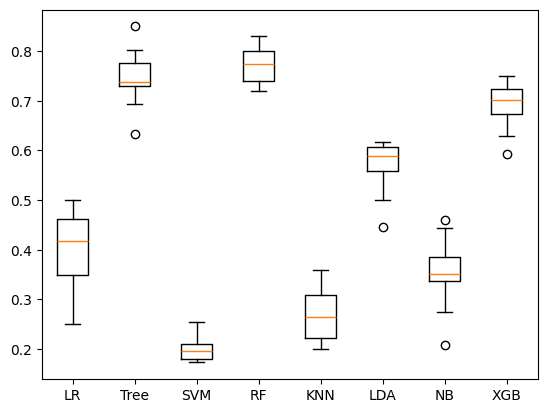

In [241]:
fig = plt.figure()
axis = fig.add_subplot(111)
plt.boxplot(results)
axis.set_xticklabels(names)
plt.show()

In [242]:
# Class Imbalance

# Under Sampling : Remove the extra observations from the majority class in order to match the records in the minority class
# Over Sampling : Create duplicate records for Minority class inorder to match the majority class

# SMOTE[Synthetic Minority Over Sampling] : Over sampling by taking the avg of random samples and creating new records ut of those samples

In [248]:
df[df['Exited']==0].shape

(7963, 13)

In [251]:
df[df['Exited']==1].shape # here exited =1 are in minority

(2037, 13)

In [265]:
from imblearn.over_sampling import SMOTE 
#from sklearn.externals import six

In [266]:
s = SMOTE()

In [268]:
x_train_smote,y_train_smote = s.fit_resample(x_train,y_train)

In [269]:
from collections import Counter

In [270]:
print("before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

before SMOTE: Counter({0: 6359, 1: 1641})
After SMOTE: Counter({0: 6359, 1: 6359})


In [271]:
from sklearn.linear_model import LogisticRegression

In [272]:
lr = LogisticRegression()

In [273]:
lr.fit(x_train_smote,y_train_smote)

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [274]:
pred_glm = lr.predict(x_test)

In [278]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_glm)

array([[1053,  551],
       [ 144,  252]])

In [279]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train_smote,y_train_smote)
pred_tree = dtree.predict(x_test)
confusion_matrix(y_test,pred_tree)

array([[1273,  331],
       [ 150,  246]])

In [280]:
# Summary of Supervised Learning

In [281]:
# Predictive model : Learning from the statistical relationship b/w y & all the x vars
# Train & Test samples : Devide the data randomly in such a way both train & test samples represent the population data

In [283]:
# Linear models
# Sklearn & Statsmodels
# Linear Regression : OLS[Line of best fit], Fitted values, Actual Values, Slope co-efficient, Intercept, R2 and Adjusted R2
# Cost function
# Assumptions : all x vars should have a liner relationship with the Y var, Avoid multi-collinearity, Residuals should be
# normally distributed or should be independent
# Overfitted (Less bias) : Regularisation

# Non-linear models : Exponential, Reciprocal, Squared, Square root, Log, SVM, Decision Trees
# Ensemble : Random Forest. XGBoost

# Decision Trees Regressor : Split Criterea (MSE), Arguments to control the growth of the tree (Max-depth, max_leafnodes, min_leafnodes)
# Pruning based on cost complexity

# Handling outliers
# Dummy variables (categorical x vars)
# Logistic Regression : Maximum Likelihood, Log Loss, Probabilistic model, AUC/ROCR
# Cost function : Function which quantifies the error b/w actual and fitted values
# Decision Tree Classifier : Split Criteria(Gini or (entropy and informaation gain) or Chi2)
# Data Preparation & Evaluation

In [285]:
#loss fn--> (yi-exp(y))^2